In [11]:
!pip install -r requirements.txt

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


In [3]:
import pandas as pd
data = pd.read_csv('data/shock_patients_processed.csv')

In [6]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Columns to be used as predictors
predictor_columns = [
    'covid', 'code_status', 'apache_score', 'apache_pred_mort', 'vfd', 'los',
    'twa', 'age', 'gestation_age', 'gender', 'height', 'weight', 'type_of_admission',
    'foley_hours', 'cvc_hours', 'vented_hours', 'los_in_hours', 'imv_hours', 'niv_hours',
    'imv_vent_days', 'niv_vent_days', 'total_vent_days', 'hfnc_days', 'hfnc_hours',
    'age_in_days', 'unit_name', 'unit_specialty', 'hospital_name', 'city_code', 'state_code',
    'country_code', 'max_Hb', 'min_Hb', 'first_Hb', 'max_Urea', 'min_Urea', 'first_Urea',
    'max_Creatinine', 'min_Creatinine', 'first_Creatinine', 'max_%%(Lact)%%', 'min_%%(Lact)%%',
    'first_%%(Lact)%%', 'max_bp', 'min_bp', 'first_bp', 'max_fio2', 'min_fio2', 'first_fio2',
    'max_gcs', 'min_gcs', 'first_gcs', 'max_gcseyes', 'min_gcseyes', 'first_gcseyes',
    'max_gcsmotor', 'min_gcsmotor', 'first_gcsmotor', 'max_gcsverbal', 'min_gcsverbal',
    'first_gcsverbal', 'max_map', 'min_map', 'first_map', 'max_rr', 'min_rr', 'first_rr',
    'max_spo2', 'min_spo2', 'first_spo2', 'max_temperature', 'min_temperature', 'first_temperature',
    'age_category'
]

# Creating the target variable
data['target'] = (data['discharge_disposition'] == 'Death').astype(int)

# Selecting the predictor variables
X = data[predictor_columns]

# Handling categorical variables by using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Target variable
y = data['target']

# Filling missing values with the median of each column
X_filled = X.fillna(X.median(numeric_only=True))

# Splitting the filled data into training and testing sets
X_train_filled, X_test_filled, y_train, y_test = train_test_split(X_filled, y, test_size=0.2, random_state=42)

# Creating a new random forest classifier
clf_filled = RandomForestClassifier(random_state=42)

# Fitting the model with the filled data
clf_filled.fit(X_train_filled, y_train)

# Predicting the test set results
y_pred_filled = clf_filled.predict(X_test_filled)

# Calculating the accuracy
accuracy_filled = accuracy_score(y_test, y_pred_filled)

# Getting the feature importance using mean Gini distance
feature_importance_filled = clf_filled.feature_importances_

# Creating a DataFrame to display the feature importance
feature_importance_df_filled = pd.DataFrame({
    'Feature': X_filled.columns,
    'Importance': feature_importance_filled
}).sort_values(by='Importance', ascending=False)

# Displaying the accuracy and top 10 significant features
accuracy_filled, feature_importance_df_filled.head(10)

(0.9197530864197531,
             Feature  Importance
 2               vfd    0.090790
 52          min_map    0.041941
 36         max_fio2    0.039565
 40          min_gcs    0.037491
 46     min_gcsmotor    0.034458
 11     vented_hours    0.032871
 43      min_gcseyes    0.029491
 37         min_fio2    0.026704
 49    min_gcsverbal    0.026036
 17  total_vent_days    0.025648)

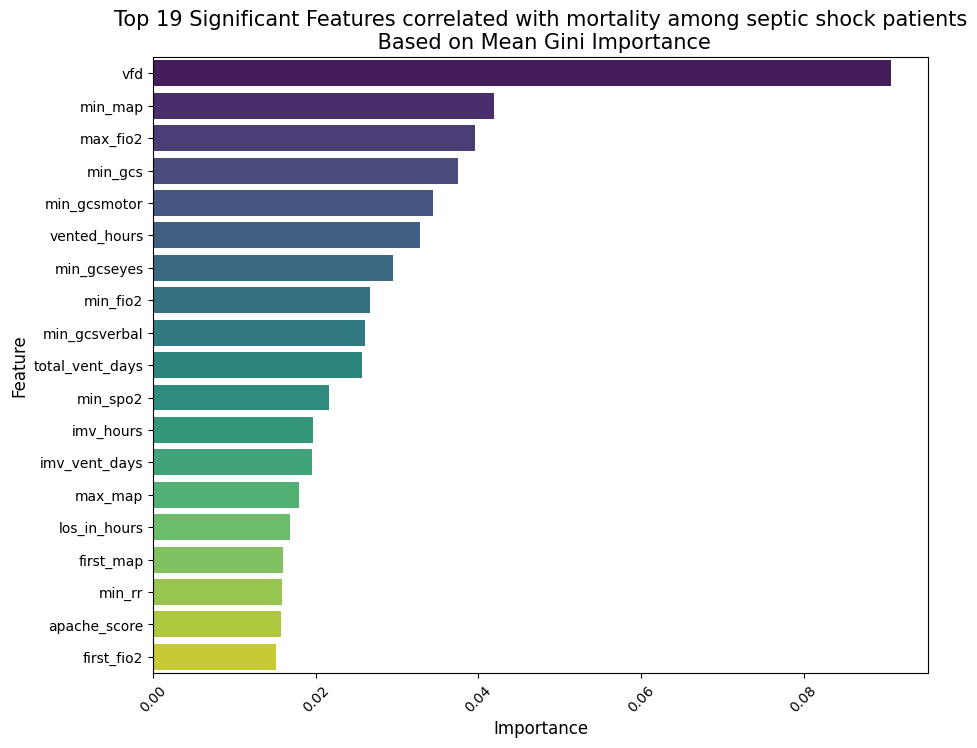

In [12]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

n_features = 19

# Selecting the top features for visualization
top_features = feature_importance_df_filled.head(n_features)

# Plotting the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title(f'Top {n_features} Significant Features correlated with mortality among septic shock patients\n Based on Mean Gini Importance', fontsize=15)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(rotation=45)
plt.savefig(f'data/Top {n_features} Gini features.png')
plt.show()